<a href="https://colab.research.google.com/github/GAYEONii/Gayeon/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [52]:
train.isnull().sum() #결측값 분석

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
#그래프를 이용한 데이터 분석
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
#Survived컬럼(생존여부)과 다른 컬럼들 간의 상관관계 분석
def bar_chart(feature) :
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survived, dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

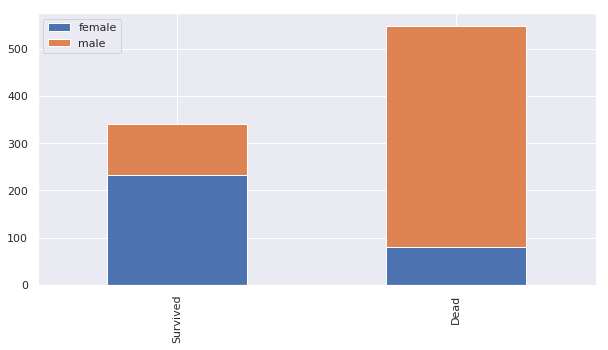

In [55]:
bar_chart('Sex') #성별에 따른 생존여부

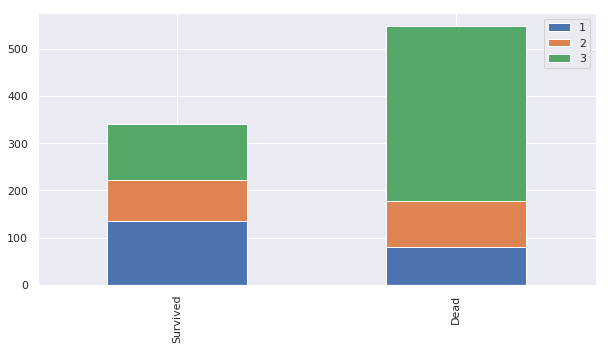

In [56]:
bar_chart('Pclass') #승선권에 따른 생존여부

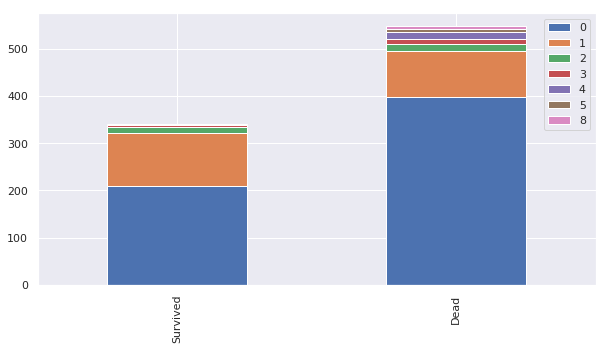

In [57]:
bar_chart('SibSp') #동반한 형제자매, 배우자 수에 따른 생존여부

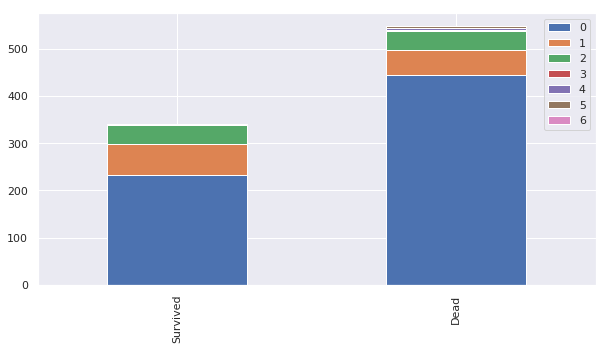

In [58]:
bar_chart('Parch') #부모와 자녀수에 따른 생존여부

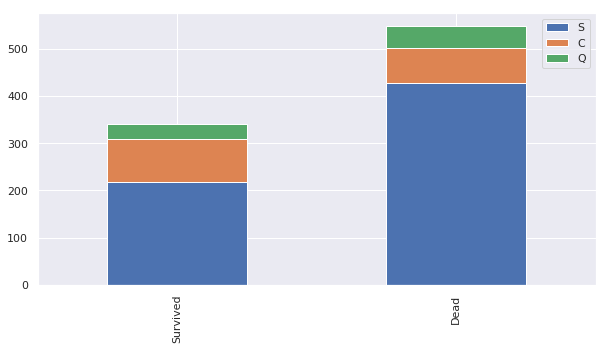

In [59]:
bar_chart('Embarked') #승선한 항구에 따른 생존여부

In [60]:
#Reature Engineering 데이터 전처리 과정


train.describe(include="all")
#Age의 약 20% 데이터가 Null로 되어있다.
#Cabin의 대부분 값은 Null이다.
#Name, Sex, Ticket, Cabin, Embarked는 숫자가 아닌 문자값이다. (연관성 없는 데이터는 삭제하거나 숫자로 바꿀 예정)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stahelin-Maeglin, Dr. Max",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
#1.Cabin, Ticket 값 삭제
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [63]:
#2. Embarked 값 가공
#(Embarked의 각각 값의 개수(S,C,Q))
southampton = train[train["Embarked"]=="S"].shape[0]
print("S : ", southampton)
cherbourg = train[train["Embarked"]=="C"].shape[0]
print("C : ", cherbourg)
queenstown = train[train["Embarked"]=="Q"].shape[0]
print("Q : ", queenstown)

S :  644
C :  168
Q :  77


In [0]:
#2개의 값이 Null로 되어있다. 대부분의 값이 S이기 때문에 비어있는 두 값도 S로 채우자
train = train.fillna({"Embarked": "S"})

In [65]:
#S,C,Q값을 숫자로 변경(머신러닝은 숫자를 인식하고 문자는 인식하지 않는다.)
embarked_mapping = {"S" :1, "C" :2, "Q" :3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [66]:
#3. Name 값 가공하기
combine = [train, test]

for dataset in combine :
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [67]:
#비슷한 글자는 바꾸고 최대한 줄여서 정리
#Mr, Mrs, Miss, Royal, Rare, Master로 줄이기
#이를 바탕으로 각 생존률의 평균 구하기

for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
  
  dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#Royal은 모두 생존한걸 확인 가능

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [68]:
#1부터 6까지로 매핑하여 숫자로 변경
#map() : 데이터 가공에서 많이 쓰임
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)
  
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [69]:
#4. train 함수의 Name과 PassengerId 삭제
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [70]:
#male은 0, female은 1
sex_mapping = {"male" : 0, "female" : 1}
for dataset in combine :
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [71]:
#5. Age 값 가공하기
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


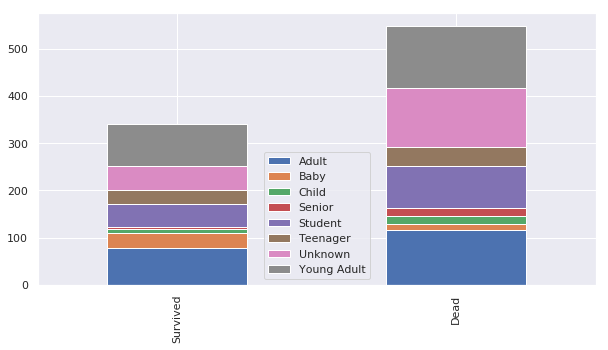

In [72]:
bar_chart('AgeGroup')

In [73]:
#분석결과 Null값의 Unknown의 대부분이 사망한 것으로 나옴
#이 값을 앞서 Title에 따라 연령을 추측해서 넣기
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
  if train["AgeGroup"][x] == "Unknown":
    train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
    
for x in range(len(test["AgeGroup"])):
  if test["AgeGroup"][x] == "Unknown":
    test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [74]:
#AgeGroup을 숫자로 변경 후 Age 삭제
age_mapping = {'Baby': 1, 'Chiled': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4.0
1,1,1,1,1,0,71.2833,2,3,6.0
2,1,3,1,0,0,7.9250,1,2,5.0
3,1,1,1,1,0,53.1000,1,3,5.0
4,0,3,0,0,0,8.0500,1,1,5.0


In [75]:
#6. Fare는 qcut을 사용해 4개의 범위로 나눔
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1,2,3,4])

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4.0,1
1,1,1,1,1,0,2,3,6.0,4
2,1,3,1,0,0,1,2,5.0,2
3,1,1,1,1,0,1,3,5.0,4
4,0,3,0,0,0,1,1,5.0,2


In [89]:
#데이터 모델링 -Test Set의 Survived 생존여부를 예측하는 과정
#Train Set을 X, Y갑으로 나누어 준다.

train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

#Train_data:X, target:Y

((891, 8), (891,))

In [90]:
train.info() #null값이 없는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    866 non-null float64
FareBand    891 non-null category
dtypes: category(1), float64(1), int64(7)
memory usage: 56.8 KB


In [0]:
#모델링을 위한 라이브러리(sklearn)
#K-fold를 통해 교차검증하고 랜덤포레스트 알고리즘 활용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [0]:
#K-fold cross validation: 교차 검증의 한 방법으로 일반적으로 검증용 데이터가 별도로 존재하는 경우가 많지 않기 떄문에
#보통은 원래 학습용으로 확보한 데이터를 학습용과 검증용으로 분리하여 학습용 데이터로 학습한 후 검증용 데이터로 검증합니다.
#교차검증: 데이터를 어떻게 분리하느냐에 따라 검증 성능이 달라질 수 있음. 여러가지 방식으로 데이터를 분리하여 검증을 실시하고 평균성능과 성능분산을 모두 구한다.

#K-fold CV: 데이터 셋을 K개의 Sub-set로 분리하는 방법으로 분리된 K개의 sub-set 중 하나만 제외한 K-1개의 sub-sets를 training set으로 이용하는 K개의 모형을 추정한다.
#K-fold CV를 활용하여 Train set 데이터를 10개의 fold로 나눠보기
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [98]:
clf = RandomForestClassifier(n_estimators=13) #13개의 이웃을 기준으로 측정
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score) #교차 검증 스코어

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored